# *Import Data*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,"/content/drive/My Drive/Colab Notebooks/Data Mining")

In [ ]:
from collections import Counter
from imblearn.combine import SMOTEENN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pdb import set_trace
import pickle
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_precision_recall_curve, plot_roc_curve, balanced_accuracy_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, Markdown

# Read in data
def get_data():
    df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Mining/bank-additional-full.csv',sep=';')
   # df.shape
    #df.info()
    #df.isnull().sum().sum()
    # Binarization categorical data

    df = pd.get_dummies(df,
                        columns=['job', 'marital', 'education', 'contact',
                                 'month', 'housing', 'loan', 'poutcome',
                                 'default','day_of_week'])

    # Mapping target to numeric in column 
    df['y'] = df['y'].map({'yes':1,'no':0})
    y = df['y']
    df.drop(columns=['y'], axis=1, inplace=True)
    X = df
    
    # split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
    return df, X, y, X_train, X_test, y_train, y_test

In [ ]:
#from read_in import *
import pdb
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 20})

In [ ]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 20})

### Loading data after one-hot ecoding and train, test split

In [ ]:
df, X, y, X_train, X_test, y_train, y_test = get_data()

In [ ]:
print(Counter(y_train))
    
print('x_train:',(X_train.shape))
print('x_test:',(X_test.shape))

print('y_train:',(y_train.shape))

print('y_test:',(y_test.shape))

Counter({0: 27404, 1: 3487})
x_train: (30891, 63)
x_test: (10297, 63)
y_train: (30891,)
y_test: (10297,)


### Define sampling strategy i.e. balance binary classes using under-sampling

In [ ]:
# define sampling strategy
under = RandomUnderSampler(random_state=42)

# fit and apply the transform
X_train, y_train = under.fit_resample(X_train, y_train)

In [ ]:
counter = Counter(y_train)
counter

Counter({0: 3487, 1: 3487})

In [ ]:
boxplot_fold_scores = []
bal_acc_scores = []

### Model 1: **Untuned** LR

In [ ]:
def log_scores( X_train, X_test, y_train, y_test):
    '''Logist Regression function'''
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    
    lg.score(X_test,y_test)
    y_pred_untuned_lr = lg.predict(X_test)
    plot_confusion_matrix(lg, X_test, y_test, values_format = '.0f') 
    y_prob_untuned_lr = lg.predict_proba(X_test)[:, 1]
    ba_untuned_lr = balanced_accuracy_score(y_test, y_pred_untuned_lr)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.
                format(ba_untuned_lr))
    print(classification_report(y_test, y_pred_untuned_lr))
    return lg, y_pred_untuned_lr, y_prob_untuned_lr, ba_untuned_lr

Accuracy of logistic regression classifier on test set: 0.87
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      9144
           1       0.44      0.88      0.59      1153

    accuracy                           0.86     10297
   macro avg       0.71      0.87      0.75     10297
weighted avg       0.92      0.86      0.88     10297



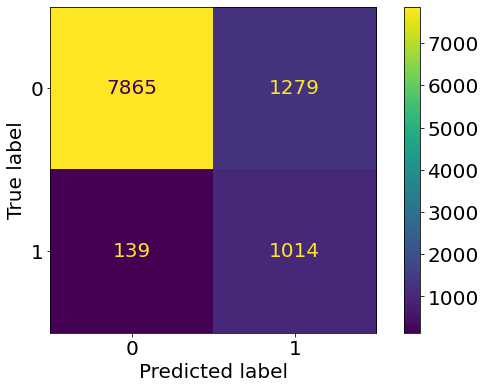

In [ ]:
lg, y_pred_untuned_lr, y_prob_untuned_lr, ba_untuned_lr = log_scores( X_train, X_test, y_train, y_test)
bal_acc_scores.append(('LR - Untuned', ba_untuned_lr))

### Model 2: **Untuned** KNN)

In [ ]:
def knn_scores(X_train, X_test, y_train, y_test):
    '''Knn function'''
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn.score(X_test, y_test)
    
    
    y_pred_untuned_knn = knn.predict(X_test)
    plot_confusion_matrix(knn, X_test, y_test, values_format = '.0f') 
    y_prob_untuned_knn = knn.predict_proba(X_test)[:, 1]
 
    ba_untuned_knn= balanced_accuracy_score(y_test,y_pred_untuned_knn)
 
    print('Accuracy of KNN classifier on test set: {:.2f}'.
                format(ba_untuned_knn))
    print(classification_report(y_test, y_pred_untuned_knn))
    return knn, y_pred_untuned_knn, y_prob_untuned_knn, ba_untuned_knn

Accuracy of KNN classifier on test set: 0.86
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      9144
           1       0.40      0.89      0.55      1153

    accuracy                           0.84     10297
   macro avg       0.69      0.86      0.73     10297
weighted avg       0.92      0.84      0.86     10297



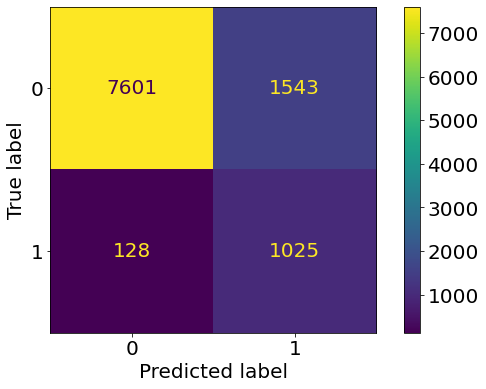

In [ ]:
knn, y_pred_untuned_knn, y_prob_untuned_knn, ba_untuned_knn = knn_scores(X_train, X_test, y_train, y_test)
bal_acc_scores.append(('KNN - Untuned', ba_untuned_knn))

### Model 3: **Untuned** SVM

In [ ]:
def svm_scores(X_train, X_test, y_train, y_test):
    '''SVM function'''
    svc= svm.SVC(probability=True)
    svc.fit(X_train, y_train)
    svc.score(X_test, y_test)
    y_pred_untuned_svc = svc.predict(X_test)
    plot_confusion_matrix(svc, X_test, y_test, values_format = '.0f') 
    y_prob_untuned_svc = svc.predict_proba(X_test)[:, 1]
    ba_untuned_svc= balanced_accuracy_score(y_test,y_pred_untuned_svc)
 
    print('Accuracy of SVM classifier on test set: {:.2f}'.
                format(ba_untuned_svc))
    print(classification_report(y_test, y_pred_untuned_svc))
   
    return svc, y_pred_untuned_svc, y_prob_untuned_svc, ba_untuned_svc

Accuracy of SVM classifier on test set: 0.85
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      9144
           1       0.42      0.84      0.56      1153

    accuracy                           0.85     10297
   macro avg       0.70      0.85      0.74     10297
weighted avg       0.91      0.85      0.87     10297



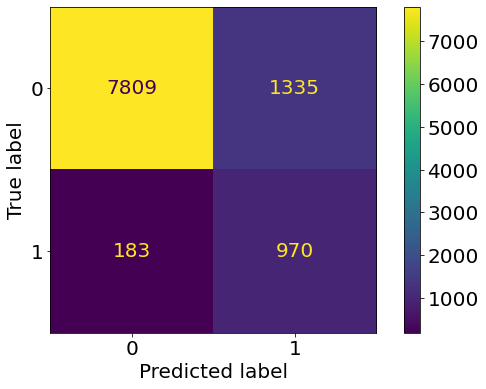

In [ ]:
svc, y_pred_untuned_svc, y_prob_untuned_svc, ba_untuned_svc = svm_scores(X_train, X_test, y_train, y_test)
bal_acc_scores.append(('SVC - Untuned', ba_untuned_svc))

### Model 4: **Untuned** RF

In [ ]:
def RandonForest_scores(X_train, X_test, y_train, y_test):
    '''Random Forest'''
    rf=  RandomForestClassifier(max_depth=2, random_state=0)
    rf.fit(X_train, y_train)
    rf.score(X_test, y_test)
    y_pred_untuned_rf = rf.predict(X_test)
    plot_confusion_matrix(rf, X_test, y_test, values_format = '.0f') 
    y_prob_untuned_rf = rf.predict_proba(X_test)[:, 1]
    ba_untuned_rf= balanced_accuracy_score(y_test,y_pred_untuned_rf)
 
    print('Accuracy of Random Forrest classifier on test set: {:.2f}'.
                format(ba_untuned_rf))
    print(classification_report(y_test, y_pred_untuned_rf))
   
    return rf, y_pred_untuned_rf, y_prob_untuned_rf, ba_untuned_rf

Accuracy of Random Forrest classifier on test set: 0.76
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      9144
           1       0.36      0.68      0.47      1153

    accuracy                           0.83     10297
   macro avg       0.66      0.76      0.68     10297
weighted avg       0.89      0.83      0.85     10297



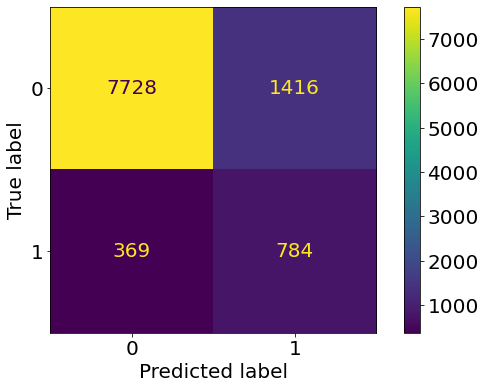

In [ ]:
rf, y_pred_untuned_rf, y_prob_untuned_rf, ba_untuned_rf = RandonForest_scores(X_train, X_test, y_train, y_test)
bal_acc_scores.append(('RF - Untuned', ba_untuned_rf))

### Model 5: Tuned LR

In [ ]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('scaler' , StandardScaler()), ('classifier' , LogisticRegression())])

# Create param grid.
param_grid = [{'classifier__penalty' : ['l1', 'l2'],
               'classifier__C' : [100, 10, 1.0, 0.1, 0.01],
               'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear']}
              ]
# Create grid search object
clf = GridSearchCV(pipe, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1, scoring='balanced_accuracy')

# Fit on data
best_clf_lr = clf.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   33.8s finished


In [ ]:
fold_names = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',
 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score',
 'split8_test_score', 'split9_test_score']
fold_scores = []
for fold_name in fold_names:
    fold_score = best_clf_lr.cv_results_[fold_name][best_clf_lr.best_index_]
    fold_scores.append(fold_score)
fold_scores = ('LR-Tuned', fold_scores)
boxplot_fold_scores.append(fold_scores)

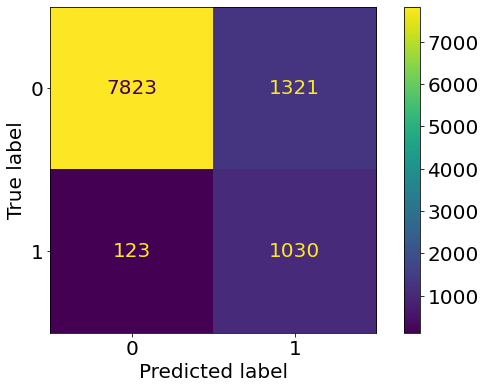

In [ ]:
plot_confusion_matrix(best_clf_lr, X_test, y_test, values_format = '.0f') 

In [ ]:
y_pred_tuned_lr = best_clf_lr.predict(X_test)
y_prob_tuned_lr = best_clf_lr.predict_proba(X_test)[:, 1]
ba_tuned_lr= balanced_accuracy_score(y_test, y_pred_tuned_lr)
bal_acc_scores.append(('LR - tuned', ba_tuned_lr))
print(classification_report(y_test, y_pred_tuned_lr))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      9144
           1       0.44      0.89      0.59      1153

    accuracy                           0.86     10297
   macro avg       0.71      0.87      0.75     10297
weighted avg       0.92      0.86      0.88     10297



### Model 6: Tuned RF

In [ ]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('scaler' , StandardScaler()), ('classifier' , RandomForestClassifier())])

# Create param grid.
param_grid = [{'classifier__n_estimators' : [10, 100, 500],
               'classifier__max_features' : ['sqrt', 'log2'],
               'classifier__max_depth' : [1, 2, 5, None],
               'classifier__max_samples' : [0.33, 0.66, 0.99]}
              ]
# Create grid search object
clf = GridSearchCV(pipe, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

# Fit on data
best_clf_rf = clf.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  6.2min finished


In [ ]:
fold_names = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',
 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score',
 'split8_test_score', 'split9_test_score']
fold_scores = []
for fold_name in fold_names:
    fold_score = best_clf_rf.cv_results_[fold_name][best_clf_rf.best_index_]
    fold_scores.append(fold_score)
fold_scores = ('RF-Tuned', fold_scores)
boxplot_fold_scores.append(fold_scores)

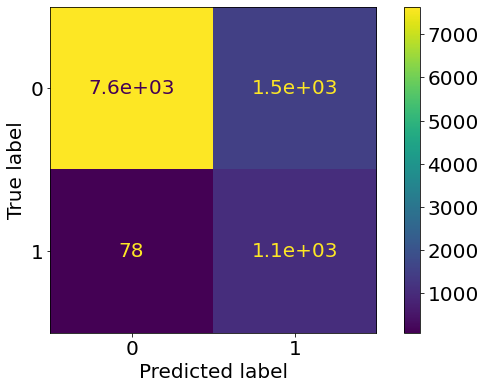

In [ ]:
plot_confusion_matrix(best_clf_rf, X_test, y_test, values_format = '.0f') 

In [ ]:
y_pred_tuned_rf = best_clf_rf.predict(X_test)
y_prob_tuned_rf = best_clf_rf.predict_proba(X_test)[:, 1]
ba_tuned_rf= balanced_accuracy_score(y_test, y_pred_tuned_rf)
bal_acc_scores.append(('RF - tuned', ba_tuned_rf))
print(classification_report(y_test, y_pred_tuned_rf))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      9144
           1       0.42      0.93      0.58      1153

    accuracy                           0.85     10297
   macro avg       0.70      0.88      0.74     10297
weighted avg       0.93      0.85      0.87     10297



### Model 7: Tuned SVC

In [ ]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('scaler' , StandardScaler()), ('classifier' , SVC(probability=True))])

# Create param grid.
param_grid = [{'classifier__kernel' : ['linear'],# , 'rbf'
               'classifier__C' : [1, 10],
               'classifier__gamma' : [1e-1, 1e-2]}
              ]

# Create grid search object
clf = GridSearchCV(pipe, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

# Fit on data
best_clf_svm = clf.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 24.6min finished


In [ ]:
fold_names = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',
 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score',
 'split8_test_score', 'split9_test_score']
fold_scores = []
for fold_name in fold_names:
    fold_score = best_clf_svm.cv_results_[fold_name][best_clf_svm.best_index_]
    fold_scores.append(fold_score)
fold_scores = ('SVC-Tuned', fold_scores)
boxplot_fold_scores.append(fold_scores)

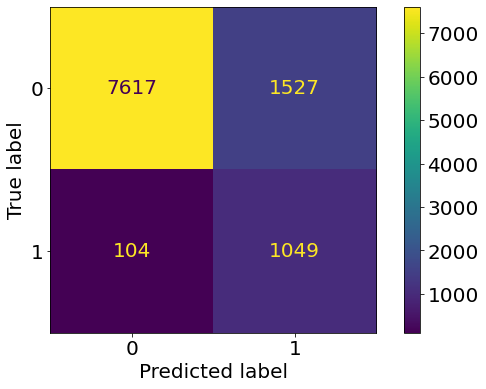

In [ ]:
plot_confusion_matrix(best_clf_svm, X_test, y_test, values_format = '.0f') 

In [ ]:
y_pred_tuned_svc = best_clf_svm.predict(X_test)
y_prob_tuned_svc = best_clf_svm.predict_proba(X_test)[:, 1]
ba_tuned_svc= balanced_accuracy_score(y_test, y_pred_tuned_svc)
bal_acc_scores.append(('SVC - tuned', ba_tuned_svc))
print(classification_report(y_test, y_pred_tuned_svc))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      9144
           1       0.41      0.91      0.56      1153

    accuracy                           0.84     10297
   macro avg       0.70      0.87      0.73     10297
weighted avg       0.92      0.84      0.87     10297



### Model 8: Tuned KNN

In [ ]:
# Create first pipeline for base without reducing features.

pipe = Pipeline([('scaler' , StandardScaler()), ('classifier' , KNeighborsClassifier())])

# Create param grid.
param_grid = [{'classifier__n_neighbors': [1, 3, 5, 7, 10],
                'classifier__p': [1, 2],
                'classifier__leaf_size': [1, 5, 10, 15]}]


# Create grid search object
clf = GridSearchCV(pipe, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

# Fit on data
best_clf_kn = clf.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  8.5min finished


In [ ]:
fold_names = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score',
 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score',
 'split8_test_score', 'split9_test_score']
fold_scores = []
for fold_name in fold_names:
    fold_score = best_clf_kn.cv_results_[fold_name][best_clf_kn.best_index_]
    fold_scores.append(fold_score)
fold_scores = ('KN-Tuned', fold_scores)
boxplot_fold_scores.append(fold_scores)

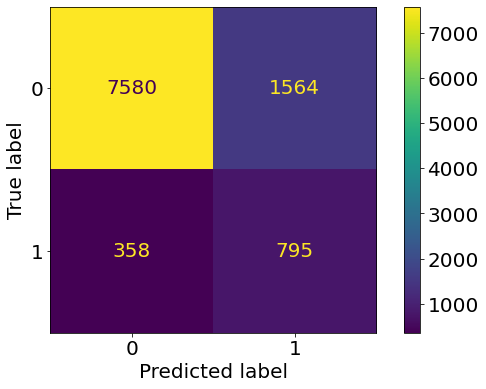

In [ ]:
plot_confusion_matrix(best_clf_kn, X_test, y_test, values_format = '.0f') 

In [ ]:
y_pred_tuned_knn = best_clf_kn.predict(X_test)
y_prob_tuned_knn = best_clf_kn.predict_proba(X_test)[:, 1]
ba_tuned_knn = balanced_accuracy_score(y_test, y_pred_tuned_knn)
bal_acc_scores.append(('KNN - tuned', ba_tuned_knn))
print(classification_report(y_test, y_pred_tuned_knn))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      9144
           1       0.34      0.69      0.45      1153

    accuracy                           0.81     10297
   macro avg       0.65      0.76      0.67     10297
weighted avg       0.89      0.81      0.84     10297



In [ ]:
boxplot_fold_scores

[('LR-Tuned',
  [0.8724928366762177,
   0.8681948424068768,
   0.8467048710601719,
   0.8853868194842407,
   0.8536788196159799,
   0.8780505878865725,
   0.8565688502453644,
   0.8636621875308763,
   0.8593930112307744,
   0.8636951223528637]),
 ('RF-Tuned',
  [0.8896848137535817,
   0.8853868194842407,
   0.8610315186246418,
   0.8839541547277937,
   0.8852223816355811,
   0.9024390243902439,
   0.8823529411764706,
   0.8708751793400287,
   0.8723098995695839,
   0.866571018651363]),
 ('SVC-Tuned',
  [0.8825214899713467,
   0.8767908309455588,
   0.8553008595988538,
   0.8825214899713467,
   0.8737446197991392,
   0.8866571018651362,
   0.866571018651363,
   0.8694404591104734,
   0.8737446197991392,
   0.8737446197991392]),
 ('KN-Tuned',
  [0.7707736389684814,
   0.7550143266475645,
   0.7406876790830945,
   0.7535816618911175,
   0.7690100430416069,
   0.7589670014347202,
   0.7790530846484935,
   0.7517934002869441,
   0.7661406025824964,
   0.7489239598278336])]

In [ ]:
bal_acc_scores

[('LR - Untuned', 0.8697858927109394),
 ('KNN - Untuned', 0.8601203619603923),
 ('SVC - Untuned', 0.8476431163255504),
 ('RF - Untuned', 0.7625548324239175),
 ('LR - tuned', 0.8744277262935368),
 ('RF - tuned', 0.8839901557730262),
 ('SVC - tuned', 0.8714028848627227),
 ('KNN - tuned', 0.7592322588037294)]

### Comparison of Cross-validation Accuracy for a Range of Algorithms

In [ ]:
names = [x[0] for x in boxplot_fold_scores]
results = [x[1] for x in boxplot_fold_scores]

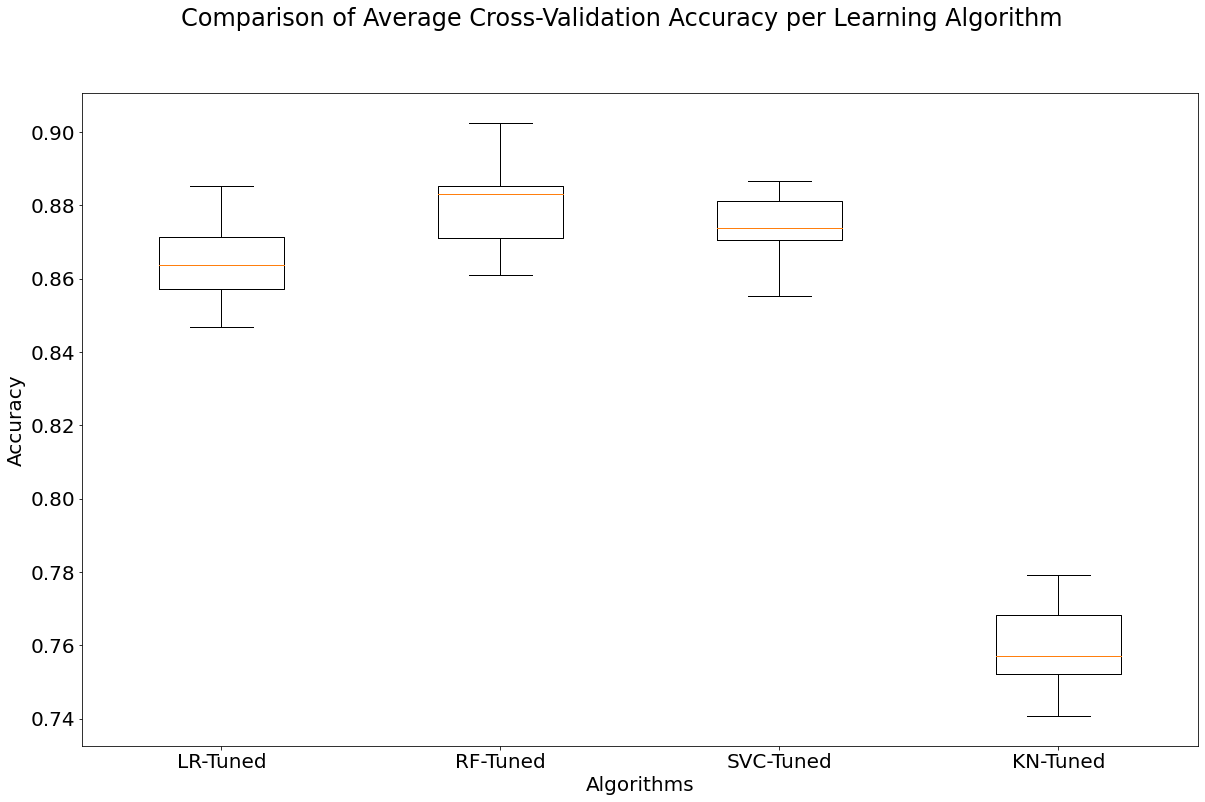

In [ ]:
plt.rcParams["figure.figsize"] = (20,12)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison of Average Cross-Validation Accuracy per Learning Algorithm')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.show()

In [ ]:
#y_pred_untuned_lr = y_pred_untuned_lr.astype(int)
#y_pred_tuned_lr = y_pred_tuned_lr.astype(int)
#y_pred_tuned_rf = y_pred_tuned_rf.astype(int)
#y_test = y_test.astype(int)

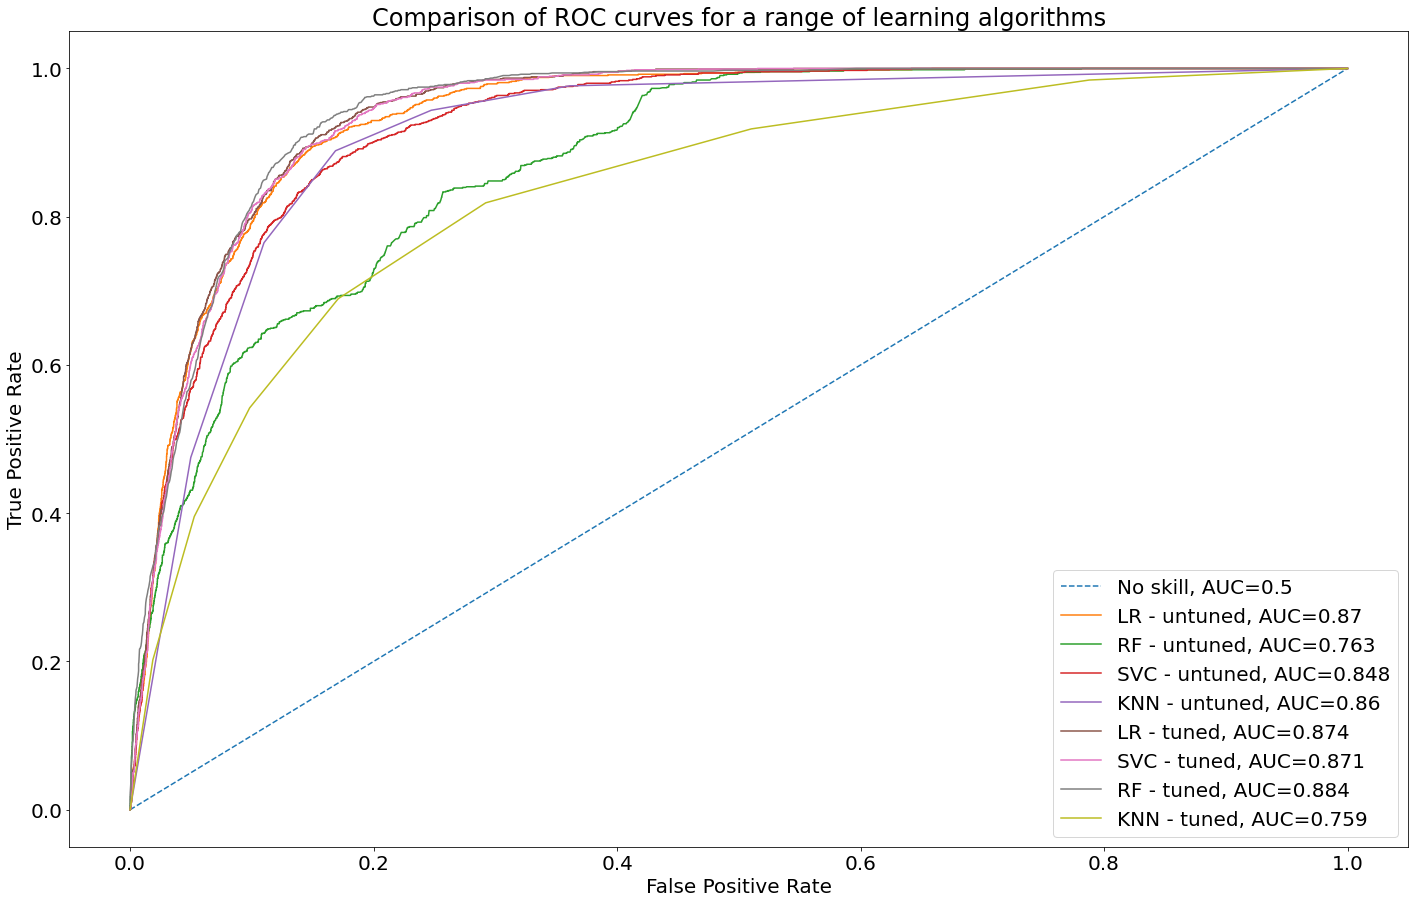

In [ ]:
plt.rcParams["figure.figsize"] = (24,15)

plt.figure(0).clf()

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

fpr, tpr, thresh = metrics.roc_curve(y_test, ns_probs)
auc = metrics.roc_auc_score(y_test, ns_probs)
plt.plot(fpr, tpr, linestyle='--', label="No skill, AUC="+str(np.round(auc, 3)))

# Untuned Algorithms
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob_untuned_lr)
auc1 = metrics.roc_auc_score(y_test, y_pred_untuned_lr)
plt.plot(fpr,tpr,label="LR - untuned, AUC="+str(np.round(auc1, 3)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob_untuned_rf)
auc2 = metrics.roc_auc_score(y_test, y_pred_untuned_rf)
plt.plot(fpr, tpr, label="RF - untuned, AUC="+str(np.round(auc2, 3)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob_untuned_svc)
auc3 = metrics.roc_auc_score(y_test, y_pred_untuned_svc)
plt.plot(fpr, tpr, label="SVC - untuned, AUC="+str(np.round(auc3, 3)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob_untuned_knn)
auc4 = metrics.roc_auc_score(y_test, y_pred_untuned_knn)
plt.plot(fpr, tpr, label="KNN - untuned, AUC="+str(np.round(auc4, 3)))


# Tuned Algorithms
fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob_tuned_lr)
auc5 = metrics.roc_auc_score(y_test, y_pred_tuned_lr)
plt.plot(fpr,tpr,label="LR - tuned, AUC="+str(np.round(auc5, 3)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob_tuned_svc)
auc6 = metrics.roc_auc_score(y_test, y_pred_tuned_svc)
plt.plot(fpr,tpr,label="SVC - tuned, AUC="+str(np.round(auc6, 3)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob_tuned_rf)
auc7 = metrics.roc_auc_score(y_test, y_pred_tuned_rf)
plt.plot(fpr,tpr,label="RF - tuned, AUC="+str(np.round(auc7, 3)))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_prob_tuned_knn)
auc8 = metrics.roc_auc_score(y_test, y_pred_tuned_knn)
plt.plot(fpr,tpr,label="KNN - tuned, AUC="+str(np.round(auc8, 3)))

plt.legend(loc=0)
plt.title('Comparison of ROC curves for a range of learning algorithms')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
df_results

,Model,Balanced Accuracy
0,LR - Untuned,0.869786
1,KNN - Untuned,0.860120
2,SVC - Untuned,0.847643
3,RF - Untuned,0.762555
4,LR - tuned,0.874428
5,RF - tuned,0.883990
6,SVC - tuned,0.871403
7,KNN - tuned,0.759232


In [ ]:
aucs = [auc1, auc4, auc3, auc2, auc5, auc7, auc6, auc8]
aucs

[0.8697858927109393,
 0.8601203619603923,
 0.8476431163255503,
 0.7625548324239175,
 0.8744277262935368,
 0.8839901557730263,
 0.8714028848627225,
 0.7592322588037294]

In [ ]:
bal_acc_scores_values

[0.8697858927109394,
 0.8601203619603923,
 0.8476431163255504,
 0.7625548324239175,
 0.8744277262935368,
 0.8839901557730262,
 0.8714028848627227,
 0.7592322588037294]

In [ ]:
bal_acc_scores_values = [x[1] for x in bal_acc_scores]
bal_acc_scores_names = [x[0] for x in bal_acc_scores]

Text(0, 0.5, 'Balanced Accuracy')

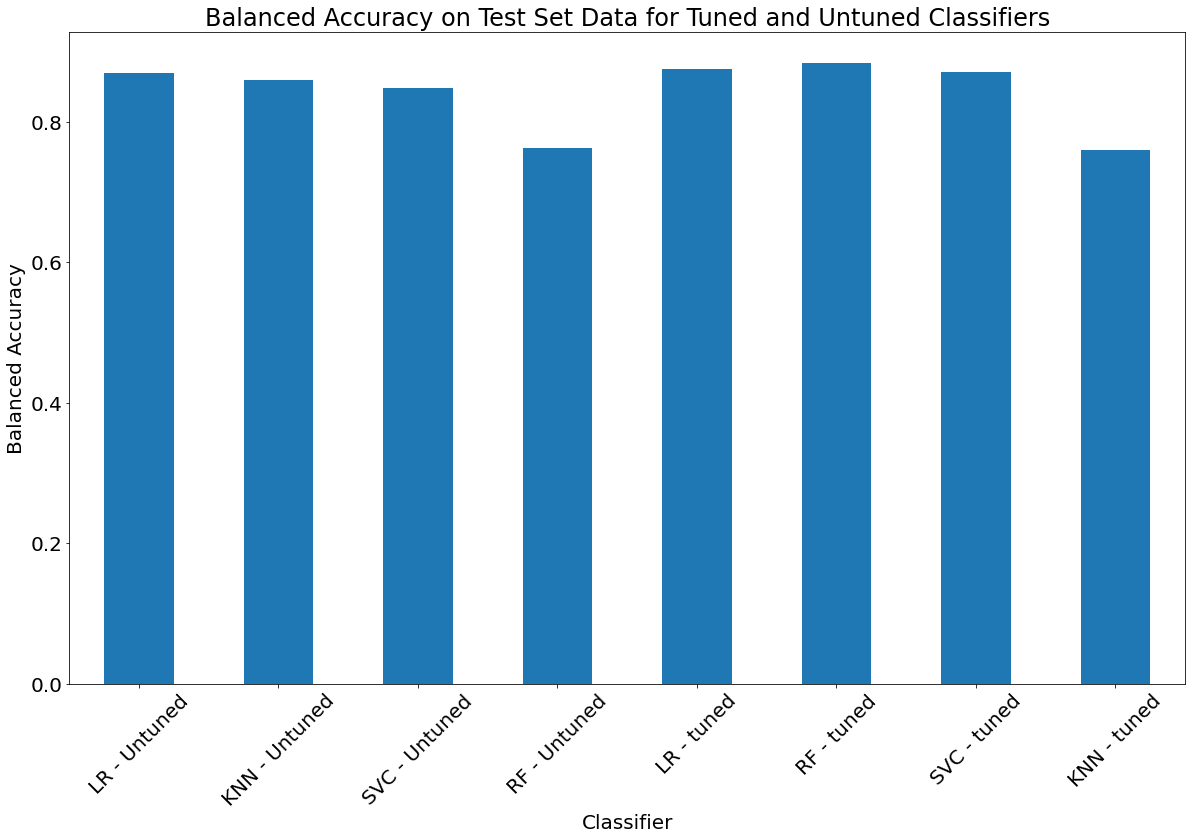

In [ ]:
plt.rcParams["figure.figsize"] = (20,12)
#df_results = pd.DataFrame({'Balanced Accuracy': bal_acc_scores_values, 'AUC': aucs}, index=bal_acc_scores_names)
df_results = pd.DataFrame({'Balanced Accuracy': bal_acc_scores_values}, index=bal_acc_scores_names)
df_results.plot.bar(rot=45, legend=None)
plt.title('Balanced Accuracy on Test Set Data for Tuned and Untuned Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Balanced Accuracy')

In [ ]:
#best_models = pd.concat([rs_ftestfdr_1pc, rs_ftestfdr_5pc, rs_boostaroota, rs_pca, rs_baseline,
#                         rs_20000_rf[rs_20000_rf['Top N Ranked Features'] == 3250],
#                         rs_20000_linearSVR[rs_20000_linearSVR['Top N Ranked Features'] == 8500],
#                         rs_20000_mig[rs_20000_mig['Top N Ranked Features'] == 6500],
#                         rs_20000_pearsonr[rs_20000_pearsonr['Top N Ranked Features'] == 750]])
#best_models.rename(columns={'Top N Ranked Features': 'Stage 1 Feature Selection', 'Non-zero Coefs after EN': 'Stage 2 Feature Selection'}, inplace=True)

#best_models = best_models.groupby('Feat Sel')[['Stage 1 Feature Selection', 'Stage 2 Feature Selection', 'Test Corr Per Run']].mean().reset_index()
best_models.iloc[:, 0:3].plot(kind='bar')
best_models['Feat Sel'] = best_models['Feat Sel'].map(name_map)

plt.title('Best Feature Selection Models  - Feature Set Size and Nested CV Correlation (Pred. vs. Actual)', fontsize=40)
plt.xlabel('Feature Selection Methods', fontsize=34)
plt.ylabel('No. of Features', fontsize=34)

plt.xticks(fontsize=28, rotation=45)
plt.yticks(fontsize=28)
plt.legend(fontsize=28, loc='upper right')
plt.yscale('log')

plt.twinx()
plt.yticks(fontsize=28)
plt.scatter(best_models['Feat Sel'], best_models['Test Corr Per Run'], color='red', marker='x', s=120,  linewidth=5)
plt.ylim(0, 0.35)